In [1]:
import tensorflow as tf
import numpy as np

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

In [3]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error',
    metrics=['accuracy']
)


In [5]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


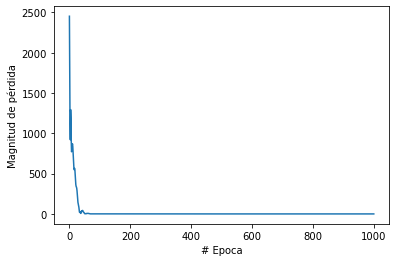

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [7]:
print("Hagamos una predicción!")
resultado = modelo.predict([28.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[82.40002]] fahrenheit!


In [8]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[0.28299138, 0.6860424 , 0.01771887]], dtype=float32), array([3.595408 , 3.710152 , 3.1814637], dtype=float32)]
[array([[-0.6117758 , -0.97684467, -0.7015384 ],
       [-0.15468703, -1.409065  ,  0.41255942],
       [ 0.17087068, -0.44830126, -1.2142252 ]], dtype=float32), array([-3.223266 , -3.6355777, -3.4346669], dtype=float32)]
[array([[-0.4593635],
       [-1.3798473],
       [-0.8439203]], dtype=float32), array([3.4550626], dtype=float32)]


In [9]:
# evaluamos el modelo
scores = modelo.evaluate(celsius, fahrenheit)
 
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))
print (modelo.predict(celsius).round())

1/1 [==============================] - 0s 2ms/step - loss: 1.4604e-10 - accuracy: 0.0000e+00

accuracy: 0.00%
[[-40.]
 [ 14.]
 [ 32.]
 [ 46.]
 [ 59.]
 [ 72.]
 [100.]]
